# Computer Exercise \#5 #


## Computer Exercise 5.1 (Linear Regression): ##

#### Common Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

### Read Data Set

In [2]:
input_file = "cars_data.csv"
df = pd.read_csv(input_file, header = 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Convert to Numpy Arrays and Prepare Data Sets

In [3]:
X_cars = df.to_numpy()         #Put df into a numpy arry X_cars
y = X_cars[:,0].reshape(-1,1)  #Extract the target values
X_cars = np.delete(X_cars,0,1) #Remove target values from X_cars

### Correlations and Heat Map

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.780255 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.839517  0.896017   
displacement -0.804203   0.950721      1.000000    0.894610  0.932824   
horsepower   -0.780255   0.839517      0.894610    1.000000  0.862633   
weight       -0.831741   0.896017      0.932824    0.862633  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.681458 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.416819 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.457016 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.681458   -0.416819 -0.457016  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

<AxesSubplot:>

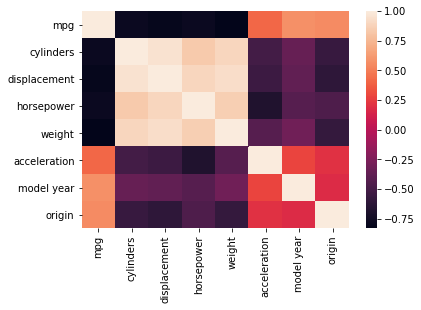

In [4]:
corr = df.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Pair Plot

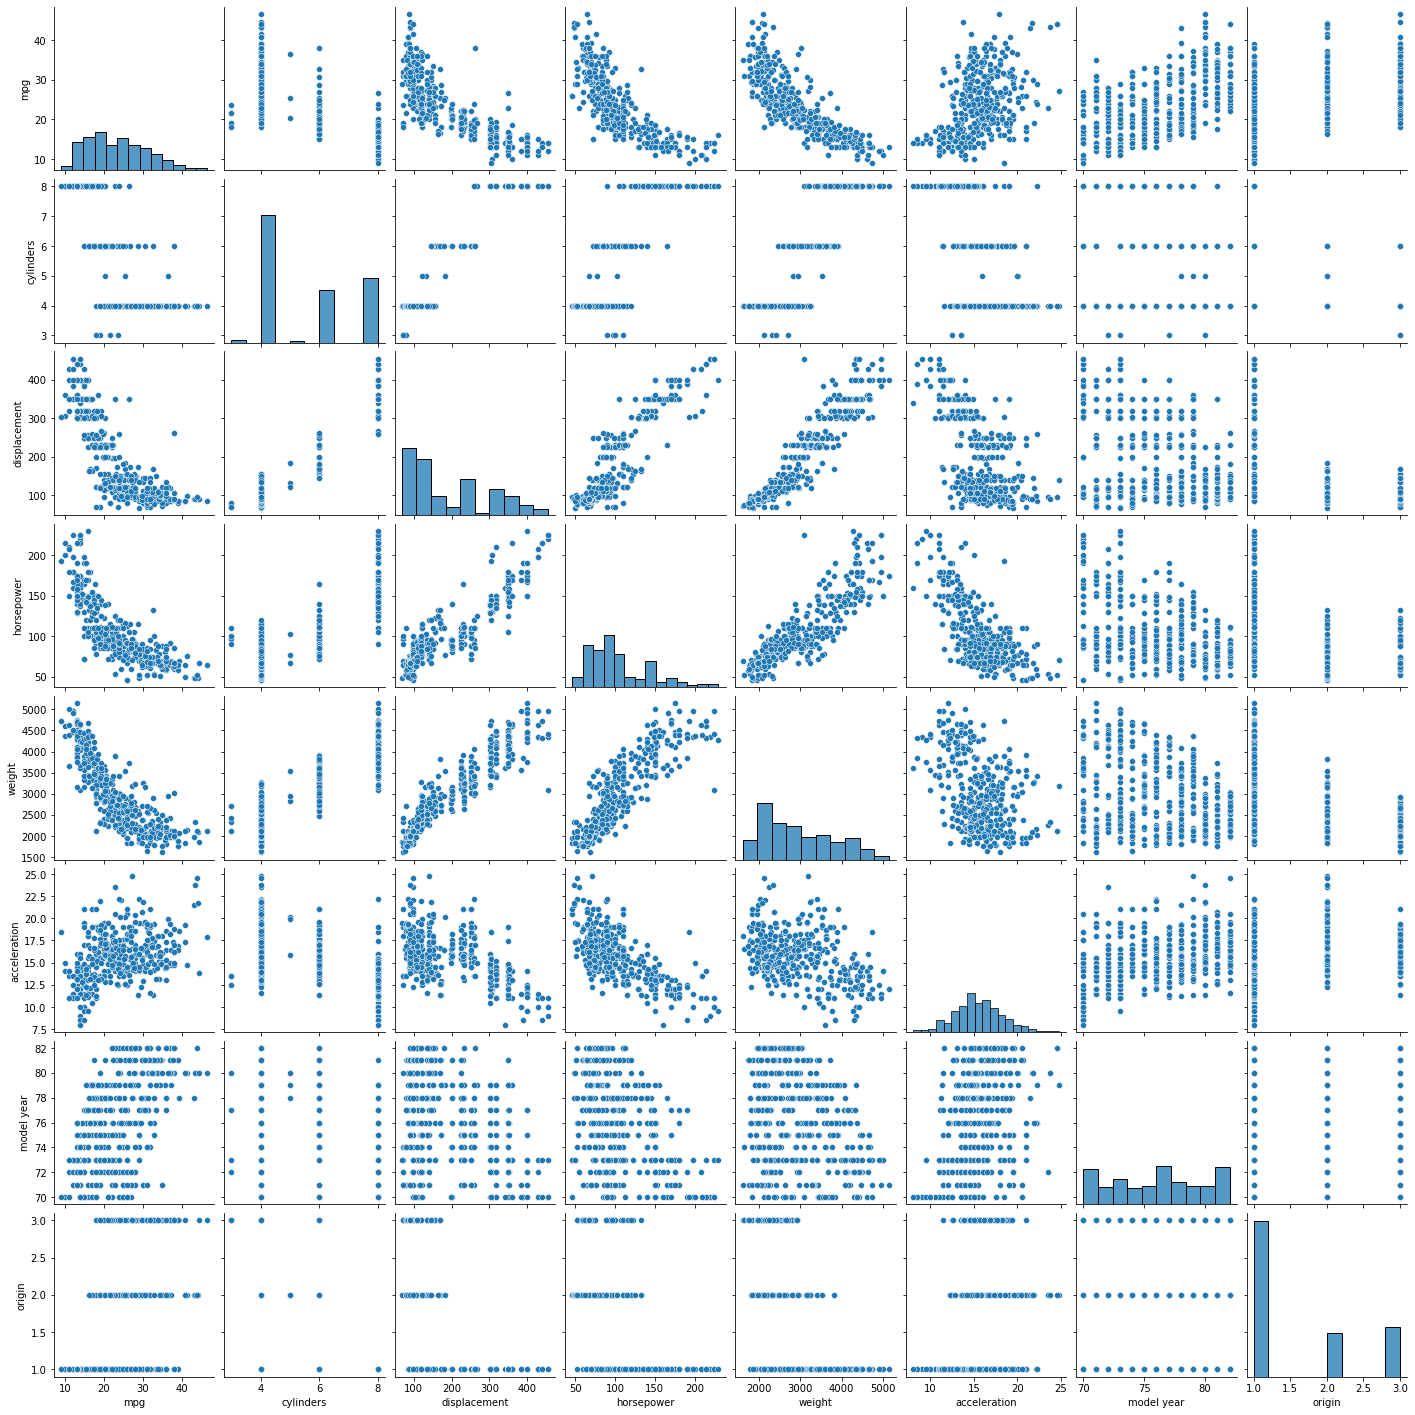

In [5]:
sns.pairplot(df)
plt.show()

### Scatter Plot of Acceleration Versus MPG

You may wish to look at other variables.

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

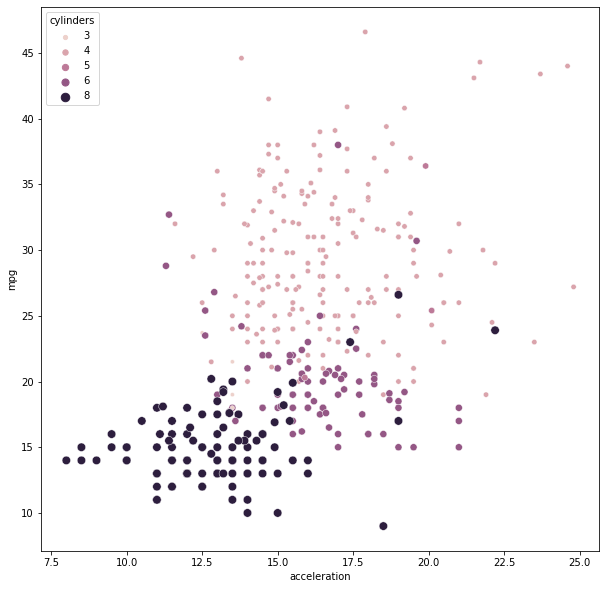

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='acceleration',y='mpg',hue='cylinders',size='cylinders')

### Questions: ###
__(a)__ Based on what you have been able to learn about the data set, what features seem to be
the best for predicting gas mileage?

> Cylinders, Displacement, Horsepower, and Weight

__(b)__ Are there any features that seem to be irrelevant or not useful in predicting gas mileage?
Which ones are they, and why would they not be useful?

> Yes. Acceleration, model year, and origin. While acceleration may have a minor impact on the milage, it is not nearly as important as the factors listed in the previous question. In regards to model year, while it's possible for improvements to be made to the vehicle every year, there is no assurance that said improvements will apply to the milage. Lastly, the origin of the car is almost irrelevant.  


### Extract the Feature for Linear Regression

Here, I am selecting feature \#1 (displacement).  You need to determine the one that you want to use.
> __Note:__ I'm using displacement because it's one of the four important features I mentioned above in a previous answer 

In [7]:
X = X_cars[:,1].reshape(-1,1)  #Put feature 1 (displacement) into the numpy array X

### Question ###

Is it important or necessary to scale the date before performing regression?

>It is important. 

### Create training and test sets 

Twenty percent are assigned to the test set.  Feel free to change it.

### Exercises: ###
__(a)__ Design a linear predictor using the training set (X_test,y_test), and evaluate it performance on the test set (X_test,y_test).


In [8]:
# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Simple linear regression
We will now use sklearn to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.
So we instantiate the linear regression class and perform the regression.

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

__(b)__ Evaluate the performance of your linear regressor and discuss how well your predictor
performs.

### R2 Score

In [10]:
r2 = lr.score(X_test,y_test)
print('r2 =', r2)

r2 = 0.6633114869465596


### Mean Square Error

In [11]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 22.415702579469855


> The predictor does not perform very well as evidenced by the R2 score. The accuracy is less than 70% and as such performs less than optimaly.

__(c)__ Create a scatter plot of the residuals to see if there is any bias or trends that were missed
by your predictor. Note that in order to do this, you will need to use your linear regressor
to predict the value of mpg from the feature you selected. This may be done using the
predict method. For the training set, this would be done as follows”
    
    y_pred = lr.predict(X_test)
    


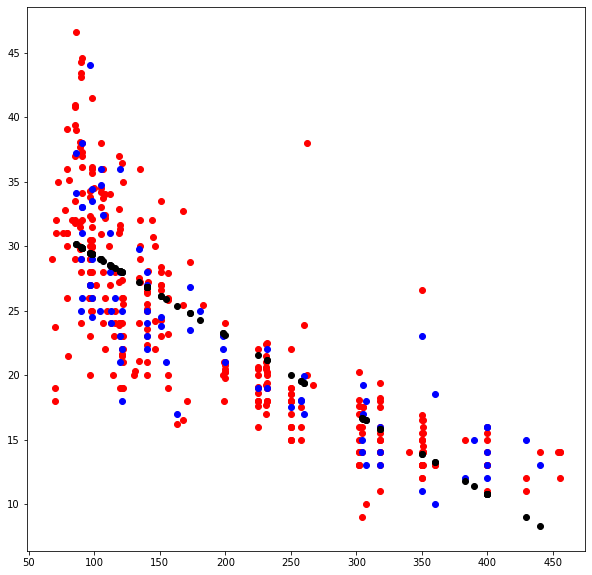

In [12]:
y_pred = lr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_pred, color = "black")


__(d)__ Discuss your results. What conclusions can you draw from this experiment?
> Not very accurate but not too bad either. Would likely improve with added features.

### Exercises: ###
(a) Repeat the previous exercise using a different feature for the linear regression.

(b) Evaluate the performance and compare it to your previous regressor.

In [13]:
X = X_cars[:,4].reshape(-1,1)  #Put feature 4 (acceleration) into the numpy array X
# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
r2 = lr.score(X_test,y_test)
print('r2 =', r2)

r2 = 0.2837692710354305


In [15]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 53.155197597335935


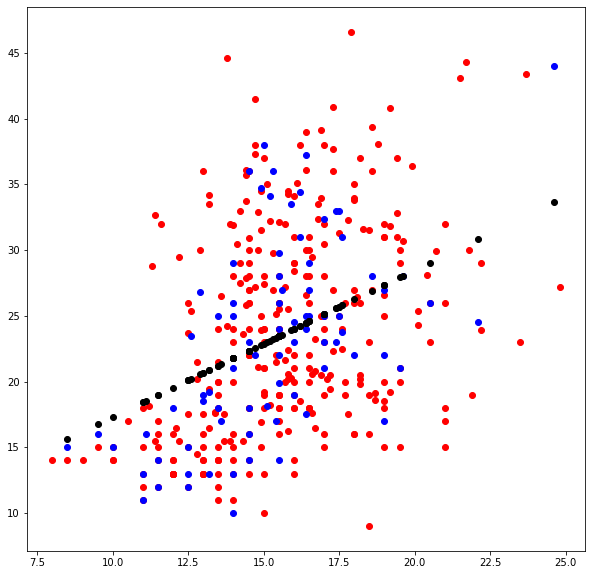

In [16]:
y_pred = lr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_pred, color = "black")


> This regressor is even less accurate than the previous one. It has the highest MSE so far and one of the lowest accuracies. This is likely to do with the fact that I chose acceleration for this regressor as it has less of an impact than displacement.

### Exercises: ###
__(a)__ Pick two features to use in a multvariate linear regressor, and form the appropriate data
matrix X. Split your data set into a training set and a test set.

> I intend to use Weight and Horsepower


In [17]:
X = X_cars[:,2:3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__(b)__ Design a two-variable linear regressor, evaluate its performance, and compare it to previous regressors.

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
r2 = lr.score(X_test,y_test)
print('r2 =', r2)

r2 = 0.6393583584775113


In [20]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 25.04383589132419


(318, 1)
(318, 1)


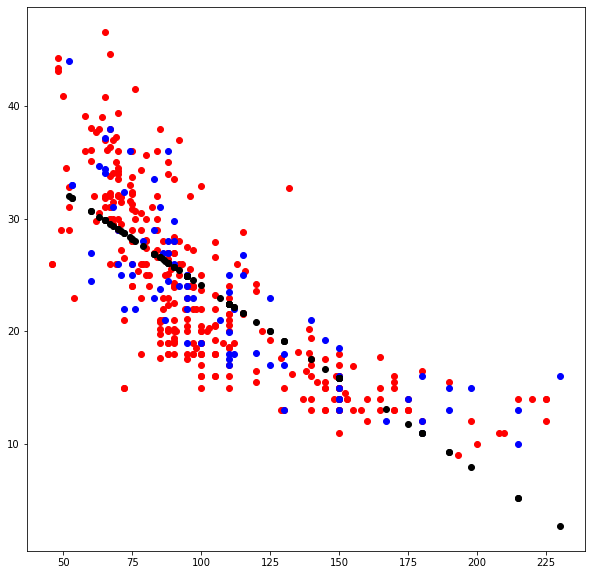

In [21]:
y_pred = lr.predict(X_test)
plt.figure(figsize=(10,10))
print(X_train.shape)
print(y_train.shape)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, y_pred, color = "black")


> This regressor is an improvement over the previous two I created. 

__(c)__ Now design a regressor that uses all of the features except the model year and origin.
Does it perform better or worse than your previous regressors? Comment and explain
what you observe.

In [22]:
#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X

X = X_cars[:,0].reshape(-1,1)  #Put all features except the last two into the numpy array X

X = np.concatenate((X_cars[:,0].reshape(-1,1),
                    X_cars[:,1].reshape(-1,1),
                    X_cars[:,2].reshape(-1,1), 
                    X_cars[:,3].reshape(-1,1),
                    X_cars[:,4].reshape(-1,1)),
                   axis = 1)
#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
r2 = lr.score(X_test,y_test)
print('r2 =', r2)

r2 = 0.7272419232619071


In [25]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 18.605944288649663


> The Regressor with all features except origin and and model year is more than 10\% more accurate than the two feature regressor. It has a greater accuracy rating and is therefore the superior regressor thus far. However, I believe that 

## Nonlinear and SVM Regression

## Computer Exercise 5.2 (Nonlinear Regression):
### Experiment:
1. Decide what feature you believe would be best for a nonlinear regressor, and design a quadratic regressor to predict the number of miles per gallon of a car.
2. Evaluate the performance of your classifier and compare it to previous designs. Is there any evidence of overfitting?



In [26]:
X = X_cars[:,3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=np.concatenate((X_train, X_train[:,0:1]**2, X_train[:,0:1]*X_train[:,1:2], X_train[:,1:2]**2), axis=1)
X_train.shape

X_test=np.concatenate((X_test, X_test[:,0:1]**2, X_test[:,0:1]*X_test[:,1:2], X_test[:,1:2]**2), axis=1)
X_test.shape

(80, 2)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
r2_train = lr.score(X_train,y_train)
r2 = lr.score(X_test,y_test)
print('r2_train = ', r2_train)
print('r2 =', r2)

r2_train =  0.7055159034461649
r2 = 0.7554139494157489


In [29]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 18.463040428340204


(318, 2)
(318, 1)


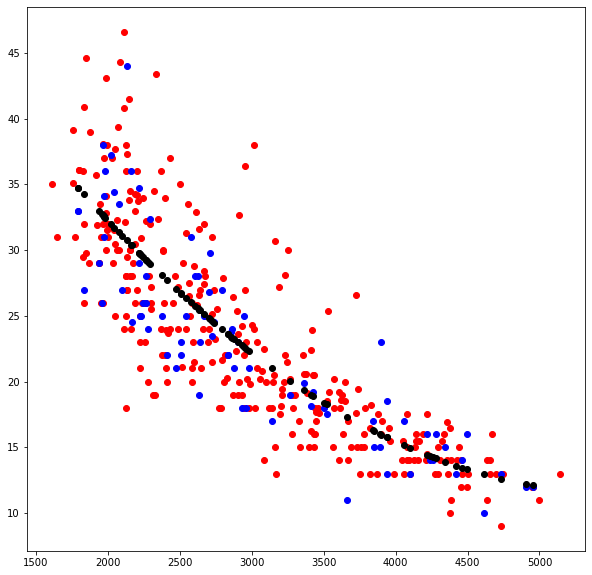

In [30]:
print(X_train.shape)
print(y_train.shape)
y_pred = lr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0], y_train, color = "red")
plt.scatter(X_test[:,0], y_test, color = "blue")
plt.scatter(X_test[:,0], y_pred, color = "black")

> The performance of the nonlinear regressor is on par in terms of accuracy with the linear regressor using 5 features, if not better. So far, this regressor performs the best. As seen by the R2 score evaluation there is no evidence of overfitting for this regressor. 

3. Repeat (a) and (b) using two features.

In [31]:
X = X_cars[:,2:3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train=np.concatenate((X_train, X_train[:,0:1]**2, X_train[:,0:1]*X_train[:,1:2], X_train[:,1:2]**2), axis=1)
X_train.shape

X_test=np.concatenate((X_test, X_test[:,0:1]**2, X_test[:,0:1]*X_test[:,1:2], X_test[:,1:2]**2), axis=1)
X_test.shape

(80, 2)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
r2_train = lr.score(X_train,y_train)
r2 = lr.score(X_test,y_test)
print('r2_train = ', r2_train)
print('r2 =', r2)

r2_train =  0.6792322977000319
r2 = 0.735508398067733


In [34]:
from sklearn.metrics import mean_squared_error as mse
print('Training Set MSE:', mse(y_train, lr.predict(X_train)))

Training Set MSE: 20.110923221238988


(318, 2)
(318, 1)


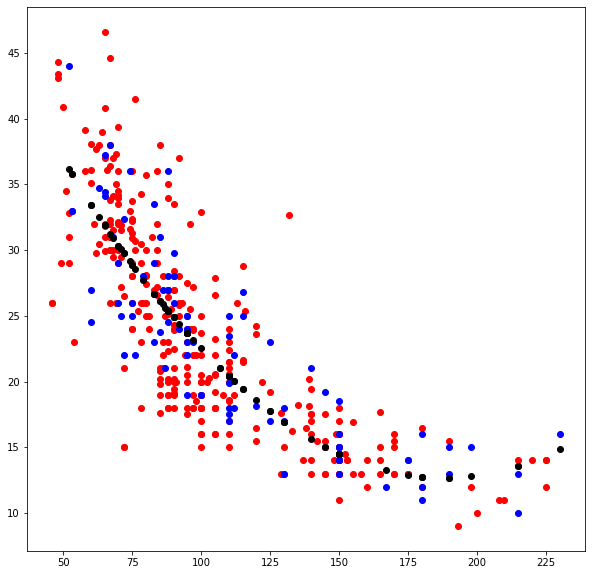

In [35]:
print(X_train.shape)
print(y_train.shape)
y_pred = lr.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0], y_train, color = "red")
plt.scatter(X_test[:,0], y_test, color = "blue")
plt.scatter(X_test[:,0], y_pred, color = "black")

>

## Computer Exercise 5.3 (Support Vector Regression):

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import SGDClassifier

In [44]:
X = X_cars[:,3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=y_train.ravel()
y_test = y_test.ravel()

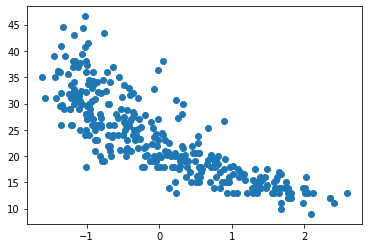

In [45]:
from sklearn.svm import SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scalar.transform(X_train)
#SVR.fit(X_train, y_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

fig, ax = plt.subplots()
colors = ('blue')

for n_class in range(1):
    ax.scatter(X_train, y_train)

In [46]:
SVR_linear= SVR(kernel = 'linear', C=100)

SVR_linear.fit(X_train,y_train)
training_accuracy =  SVR_linear.score(X_train,y_train)
test_accuracy = SVR_linear.score(X_test,y_test)

print('Linear Training Accuracy =', training_accuracy)

Training Accuracy = 0.6801630320234282


In [47]:
scalar.fit(X_test)
X_train = scalar.transform(X_test)
SVR_linear.fit(X_test,y_test)
print('Linear Test Accuracy =', test_accuracy)

Test Accuracy = 0.7307804792307476


>__Evaluation:__ The linear SVR performs fairly well with a testing accuracy above 73\%. as such it performs much better than the previous regressors except for the Nonlinear 2-Feature regressor which pereforms slightly better. As such, it is logical that adding more features to this SVR would likely improve the performance of the SVR.

 __Polynomial kernel__

In [55]:
X = X_cars[:,3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=y_train.ravel()
y_test = y_test.ravel()

from sklearn.svm import SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scalar.transform(X_train)
#SVR.fit(X_train, y_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

SVR_poly = SVR(kernel = 'poly', C=100, gamma = 'auto', degree = 5, epsilon = 10)

SVR_poly.fit(X_train,y_train)

training_accuracy =  SVR_poly.score(X_train,y_train)
test_accuracy = SVR_poly.score(X_test,y_test)

print('Poly Training Accuracy =', training_accuracy)

scalar.fit(X_test)
X_train = scalar.transform(X_test)
SVR_linear.fit(X_test,y_test)
print('Poly Test Accuracy =', test_accuracy)


Poly Training Accuracy = 0.1556643276772215
Poly Test Accuracy = 0.17636066709613485


>__NOTE:__ Polynomial SVR is absolutely terrible. Extremely low accuracy for both training and accuracy.

 __RBF kernel__

In [56]:
X = X_cars[:,3].reshape(-1,1)  #Put feature 3 (weight) into the numpy array X

#X = np.concatenate((X, X_cars[:,2].reshape(-1,1))) #Add feature 2 (horsepower) into the numpy array X


# split into training set and testing set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=y_train.ravel()
y_test = y_test.ravel()

from sklearn.svm import SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scalar.transform(X_train)
#SVR.fit(X_train, y_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

SVR_rbf = SVR(kernel = 'rbf', C=100, gamma = 0.1, epsilon = 0.5)

SVR_rbf.fit(X_train,y_train)
training_accuracy =  SVR_rbf.score(X_train,y_train)
test_accuracy = SVR_rbf.score(X_test,y_test)

print('RBF Training Accuracy =', training_accuracy)

scalar.fit(X_test)
X_train = scalar.transform(X_test)
SVR_linear.fit(X_test,y_test)
print('RBF Test Accuracy =', test_accuracy)

RBF Training Accuracy = 0.7006279432885422
RBF Test Accuracy = 0.7622004197371769


__Note:__ Gausian Kernel is a fairly good SVR. Generally good accuracy and performs better than the Linear SVR. Has superior training accuracy than previous regressors.  